<a href="https://colab.research.google.com/github/CEASLIBRARY/2D-Game_Development_with_Python/blob/main/2D_Games_with_pygames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D Games with Python

###1. Import pygame
###2. Set up a level
###3. Move the level left & right
###4. Simulate a camera
###5. Insert a player and move it

## Important:
#### There are 4 files in the github that shows the implementation of the concepts discussed in this workshop. 
#### When you run the main.py, it output a screen where you can move a player with the moving layout behind.
#### If the screens are not displayed in colab, install pygame in your system and then run the files.

#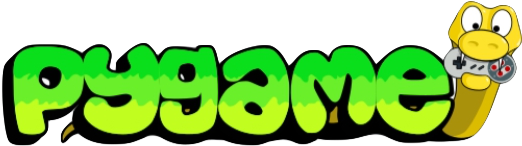
#### 2D graphics library that allows you to make little games. Very simple to set up and use for projects.
#### Helps display and draw images
#### Can also output sounds
#### Find more information: 
##### https://www.pygame.org/news
##### https://www.geeksforgeeks.org/introduction-to-pygame/
##### https://en.wikipedia.org/wiki/Pygame

## Install pygame

```
!pip install pygame
```
#### More information: 
##### https://www.geeksforgeeks.org/how-to-install-pygame-in-windows/


In [ ]:

!pip install pygame 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import pygame module



In [ ]:
# set SDL to use the dummy NULL video driver, 
# so it doesn't need a windowing system.
import os
try:
        os.environ["DISPLAY"]
except:
        os.environ["SDL_VIDEODRIVER"] = "dummy"

In [ ]:
import pygame
pygame.display.set_mode((640,480))

<Surface(640x480x32 SW)>

# main.py
### The below code needs to be in the main.py file

In [ ]:
import pygame
from sys import exit # exit closes any code once you call it

pygame.init()
w = 1200
h = 700
screen = pygame.display.set_mode((w,h))
clock = pygame.time.Clock() # clock obejct controls the frame rate and time


while True: # to keep the display running forever.
  for event in pygame.event.get(): #
    if event.type == pygame.QUIT: # pygame.QUIT is synonymous to the X button in the window
      pygame.quit 
      exit() # closes the while true loop too.

  screen.fill('black')
  pygame.display.update() # updates the display surface that is drawn inside of the while loop
  clock.tick(60) # calling it with an integer 60. The while true loop doesn't run faster than 60 times/sec



KeyboardInterrupt: ignored

---
# Methods in pygame

```
pygame.init()
```
##### Starts pygame and initiates all the sub parts of pygame that are required for the game.




```
pygame.display.set_mode()
```
##### Creates a display Surface. The arguments passed in are requests for a display type. The actual created display will be the best possible match supported by the system.
##### The argument: Tuple -> ((width, height))



```
pygame.time.Clock()
```
##### This function is used to create a clock object which can be used to keep track of time. 



```
pygame.event.get()
```
##### Returns a list of all the events that are currently in the event queue. 
##### Doing so empties the queue. Each element in the list that event.get returns is an Event object with a .type attribute



```
pygame.draw.rect()
```
##### This function is used to draw a rectangle. 
##### It takes the surface, color, and pygame Rect object as an input parameter and draws a rectangle on the surface.




```
.fill()
```
`fill(color, rect=None, special_flags=0) -> Rect`
##### Fill the Surface with a solid color. If no rect argument is given the entire Surface will be filled. 
##### The rect argument will limit the fill to a specific area. The fill will also be contained by the Surface clip area.


## **Surface**
### 2 kinds: Display and Regular
### **Display Surface:** Actual window where we are going to display for the user. These must be unique. Is always visible
### **Regular Surface:** To display anything on the Display surface, we need regular surfaces. This is basicually just an image like color, text or something imported. Can have multiple amounts. Only displayed when connected to Display surface.

# Level Layout
#### This is to have a map that indicates where the player is going to be.
### This is a new file called settings
## **Level map**
#### Strings indicate rows. Inside each string we have characters.
#### Each of the characters represent columns
#### You can tell where a certain element is going to be.
#### This code goes in a new file called settings. Here we create a string.

```
level_map = [           
'                        ',
'                        ',
'                        ',
' XX      XXX       XX   ',
' XX                     ',
' XXXX         XX     XX ',
' XXXX       XX          ',
' XX      X XXX   XX  X  ',
'       X XXXX  XX  XX   ',
'    XXXX XXXXX XX  XXX  ',
'XXXXXXXX XXXXX XX  XXX  ']


tile_size = 64 #pixels
screen_width = 1200
screen_height = 700

```
#### We will be importing the settings file in othert files to have access to the screen height and width. We can leave the screen width the same. However for screen height it must be relative to the4 level_map:

# Exercise 1
### Change the value of screen_height in settings.py so that it is influenced by the level map multiplied by the tile size i.e. replace 700. 

## Import Settings in main.py

```
from settings import *
```


### Level map shows us where elements go. 
# To turn the level map into something we can see in pygame we need 2 things:
### 1. Block that can be placed on the screen - **Sprite**
### 2. **Function** that goes through each of the elements in level_map and  place something on the screen where there is an 'X'

# Sprites in pygames
#### Objects, with different properties like height, width, color, etc., and methods like moving right, left, up and down, jump, etc. 
#### In this example, we are looking to create an object in which users can control that object and move it forward, backward, up, and down using arrow keys.



```
class Block(pygame.sprite.Sprite):

    # Constructor. Pass in the color of the block,
    # and its x and y position
    def __init__(self, color, width, height):
       # Call the parent class (Sprite) constructor
       pygame.sprite.Sprite.__init__(self)

       # Create an image of the block, and fill it with a color.
       # This could also be an image loaded from the disk.
       self.image = pygame.Surface([width, height])
       self.image.fill(color)

       # Fetch the rectangle object that has the dimensions of the image
       # Update the position of this object by setting the values of rect.x and rect.y
       self.rect = self.image.get_rect()
```



# 1. Sprite
### To put the sprite we create a new file - tiles.py


```
import pygame

# create a class
class Tile(pygame.sprite.Sprite):
    def __init__(self,size,x,y):
        super().__init__()
        self.image = pygame.Surface((size,size)) #square
        self.image.fill('grey')
        self.rect = self.image.get_rect(topleft = (x,y))

```
#### Top left is a virtual attribute of Rect object
#### The super() function is used to give access to methods and properties of a parent or sibling class. It returns an object that represents the parent class.






## Since we dont want to place the tile randomnly on the screen, we have to create another new python file - level.py

### Now we have 4 different files - main, level, tiles, settings.
### In level file we have a class Level that relies on Tiles to display something on screen
### In our main file we are only going to create 1 instance of level and draw it. This is how the code is organised so far.
```
import pygame
from tiles import Tile


# create class Level

class Level:
    # level_data is level_map, but we can pass diff level data too
    # surface is where we draw
    def __init__(self,level_data,surface): 

        # level set up
        self.display_surface = surface
        self.setup_level(level_data)

        self.world_shift = 0
```

### Go to main file and import Level

```
from level import Level

level = Level(level_map,screen)
```



### Run method for level

```
def run(self):
      pass
```
### We will discuss this later...


# 2. Function that cycles through all elements

### This places a tile wherever we find a 'X' in the level_map. This needs to be another method


```
def setup_level(self, layout):

# create a sprie group
      self.tiles = pygame.sprite.Group()

```
### let's look into the run method now.


### Whaterver we place in our tiles, we are going to draw in our run method.

```
def run(self):

    self.player.draw(self.display_surface)
```



### For loop to get the items in the row and columns of the layout
## Enumerate method
### Gives us the index and the information needed. We know that we are in a row but we need the index too, that is why we use this.



```
def setup_level(self, layout):

        self.tiles = pygame.sprite.Group()

        self.player = pygame.sprite.GroupSingle()

        # tells us which row is where
        for row_index, row in enumerate(layout):

            # # tells us which column is where
            for col_index, cell in enumerate(row):
```
### So for each row, we cycle every single item inside of the row. 

### To place a tile:


```
if cell = 'X':
                    tile = Tile((x,y), tile_size)                                        
                    # x,y must be a tuple!
                    self.tiles.add(tile)
```
### To get tile_size, import it from settings:


```
from settings import tile_size
```
#### In the above code, we are missing the values of x,y. Here they are row and column index mulitplied with tile size. We multiply it so that the tiles dont overlap.


```
for row_index, row in enumerate(layout):

            for col_index, cell in enumerate(row):

                x = col_index * tile_size
                y = row_index * tile_size

                if cell = 'X':
                    tile = Tile((x,y), tile_size)                                        
                    # x,y must be a tuple!
                    self.tiles.add(tile)
```




## Move the sprites
### We need an update method to shift the tiles. 
### In tiles.py

```
def update(self,shift):
        self.rect.x += shift
```
#### shift is by how much you want to shift

### Coming back to run method:


```
def run(self):

        # level tiles

        self.tiles.update(1) 
        # 0 is default value for this
        # if we input -4 we move in the other way

        self.tiles.draw(self.display_surface)
```

### Later once we have a player, we will have to change the attribute in self.tiles.update().


```
# This is formatted as code
```


### So in class Tile:



```
class Level:
    def __init__(self,level_data,surface):

        # level set up
        self.display_surface = surface
        self.setup_level(level_data)

        self.world_shift = 0
        # this will be the argument in self.tiles.update()

```

```
def run(self):

        # level tiles
        self.tiles.update(1) 
        
        self.tiles.draw(self.display_surface)
```







---
# Creating the Player
#### New file player.py


```
import pygame 

class Player(pygame.sprite.Sprite):
    def __init__(self,pos):
        super().__init__()

        self.image = pygame.Surface((32,64)) #value doesn't matter here
        self.image.fill('red')
        self.rect = self.image.get_rect(topleft = pos)
        # pos will be taken from the settings level_map
```

## We need to add Player character (P)

```
level_map = [           
'                        ',
'                        ',
'                        ',
' XX      XXX       XX   ',
' XX P                   ',
' XXXX         XX     XX ',
' XXXX       XX          ',
' XX      X XXX   XX  X  ',
'       X XXXX  XX  XX   ',
'    XXXX XXXXX XX  XXX  ',
'XXXXXXXX XXXXX XX  XXX  ']
```


#### If we recall, in setup_level(), we look for the character X to add tieles. Now we also need to add the player on the surface. 

# Exercise 2

#### Update the setup_level method to place our player along with the tiles.


---



```
pygame.key.get_pressed()
```
#### Returns a sequence of boolean values representing the state of every key on the keyboard. It gets all the keys we are potentially pressing.
#### Use the key constant values to index the array. A True value means that the button is pressed.



# Ability to move the player
### Player needs to move as per the key pressed i.e left or right.
### We create another method


```
def get_input(self):
    keys = pygame.key.get_pressed()

            if keys[pygame.K_RIGHT]:
            # we want the player to move right
                pass

            # we want the player to move left
            elif keys[pygame.K_LEFT]:
                pass

            else:
                pass

```
### Before we proceed let's understand what is a vector2 in pygame


## **vector2 in pygame**
### In pygame vector2 is a list that contains x and y values
#### You can add a vector to the position of rect: 

`rect.center += pygame.math.Vector2(100, 50)`
#### Can also access x, y parts seperately.

### In the class Player:


```
class Player(pygame.sprite.Sprite):
    def __init__(self,pos):
        super().__init__()

        self.image = pygame.Surface((32,64))
        self.image.fill('red')
        self.rect = self.image.get_rect(topleft = pos)

        # VECTORS
        # arrows you can draw in a coordinate system
        # eg vec(100,50)
        # this makes the movement smoother by looking at two diff
        # variables at once
                        
        self.direction = pygame.math.Vector2(0,0)
        self.speed = 8 # to increase the speed of the player
```

---


### Now, let's change self direction when you press right or left horizontally for the player

```
def get_input(self):
    keys = pygame.key.get_pressed()

            if keys[pygame.K_RIGHT]:
            # we want the player to move right
                self.direction.x = 1

            # we want the player to move left
            elif keys[pygame.K_LEFT]:
                self.direction.x = -1
            
            # no movement at all
            else:
                self.direction.x = 0 
                

```

### Create an update method just like in tiles.py


```
def update(self):

        # to call get_input function
        self.get_input()

        # to move horizontally that's why .x
        self.rect.x += self.direction.x * self.speed 
```
#### Here, self.speed = 8. We multiply it to increase the speed of the player when we move it.

### Similarily in level.py, we also need to update the self.player, just like tiles. Although for player we dont need any arguments

```
def run(self):

    self.player.update()

    self.player.draw(self.display_surface)

```



---


# Player Camera Creation

#### How to create a camera a level to check if a player is moving too far to the left or right

#### **Logic:** If the player reaches the end of the either right/left of the screen then we set the speed of player as zero. We move the entire level to a direction to give the user the illusion that the player is moving.

### In level.py, create a new method:


```
def scroll_x(self):

      # get player
      player = self.player.sprite
      
      # getting the center of the x position, where the player is
      # on the x coordinate
      player_x = player.rect.centerx

      # what direction the player is going to move in
      direction_x = player.direction.x
```
### Left side of the screen


```
# the player moves to the left only if we push the button to move left

if player_x < 200 and direction_x < 0:
                
                self.world_shift = 8
                player.speed = 0

```
### Similarily have the elif and else conditions:
### For right side of the screen lets use a random number 1000.


```
elif player_x > 1000 and direction_x > 0:
                
                self.world_shift = -8
                player.speed = 0

else:
                self.world_shift = 0
                player.speed = 8
```



## Update scroll

### Under run(self):


```
def run(self):

        # level tiles
        self.tiles.update(1) #0 is default value for this
        # if we input -4 we move in the other way
        self.tiles.draw(self.display_surface)

        # player

        self.player.update()
        self.player.draw(self.display_surface)

        self.scroll_x

```



# Exercise 3

### In the above method scroll_x(), the if conditions have constants. If our game window became larger or smaller then those wouldn't update accordingly.
### Add some code to make the scroll border numbers responsive to width of the screen i.e replace the numbers 200 and 1000.

# Helpful Resources
#### CEAS Library Python resources - http://guides.libraries.uc.edu/python
#### Online links & tutorials:
 * Python documentation - https://www.python.org/doc/
 * Python Programming wiki book - http://en.wikibooks.org/wiki/Python_Programming
 * Python tutorials - Udemy, Code academy, etc
 * Tutorials Point - https://www.tutorialspoint.com/python